# 3.3.3 Задача 3: "Пересечение функций"

## 1. Определите, в каких точках на диапазоне [−100,100] функция 1 и функция 2 из Таблицы 2 пересекают координатную ось x и пересекают ли вообще (необходимо приравнять функцию нулю и найти решение полученного уравнения). Выведите точки пересечения.

/Users/ox/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/Users/ox/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


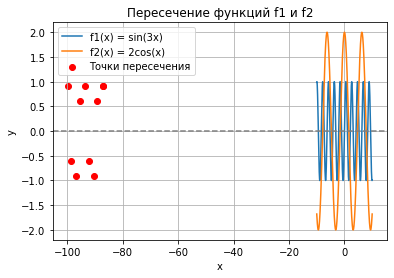

[-99.86611587674125,
 -98.65302338418245,
 -96.72455002208015,
 -95.51143073057709,
 -93.5828001208205,
 -92.36983807700284,
 -90.4415587032989,
 -89.22824542341276,
 -87.30190531313173,
 -87.29986177308486]

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

# Функции из Таблицы 2, Вариант 1
def f1(x):
    return np.sin(3 * x)

def f2(x):
    return 2 * np.cos(x)

# 1. Найти нули функций на отрезке [-100, 100]
x_range = np.linspace(-100, 100, 10000)

# Нули f1(x) = sin(3x)
f1_zeros = x_range[np.isclose(f1(x_range), 0, atol=1e-4)]

# Нули f2(x) = 2cos(x)
f2_zeros = x_range[np.isclose(f2(x_range), 0, atol=1e-4)]

# 2. уравнение sin(3x) = 2cos(x)
def intersection_eq(x):
    return f1(x) - f2(x)

# стартовые приближения через равномерную сетку
initial_guesses = np.linspace(-100, 100, 200)
solutions = []

for guess in initial_guesses:
    sol = fsolve(intersection_eq, guess)[0]
    if -100 <= sol <= 100:
        # округление до 4 знаков
        if not any(np.isclose(sol, s, atol=1e-4) for s in solutions):
            solutions.append(sol)

# Сортировать и вывести только первые 10 уникальных решений
solutions = sorted(solutions)[:10]

# Построение графика
x_vals = np.linspace(-10, 10, 1000)
plt.plot(x_vals, f1(x_vals), label='f1(x) = sin(3x)')
plt.plot(x_vals, f2(x_vals), label='f2(x) = 2cos(x)')

# точки пересечения
intersect_x = np.array(solutions)
intersect_y = f1(intersect_x)
plt.scatter(intersect_x, intersect_y, color='red', label='Точки пересечения')

plt.axhline(0, color='gray', linestyle='--')
plt.grid(True)
plt.legend()
plt.title('Пересечение функций f1 и f2')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

solutions


## 2. Найдите возможные пересечения функции 1 и функции 2 из Таблицы 2 для своего варианта, или докажите, что пересечение невозможно. Можно использовать любой способ, дающий набор решений (если решений бесконечное множество — представить первые десять).

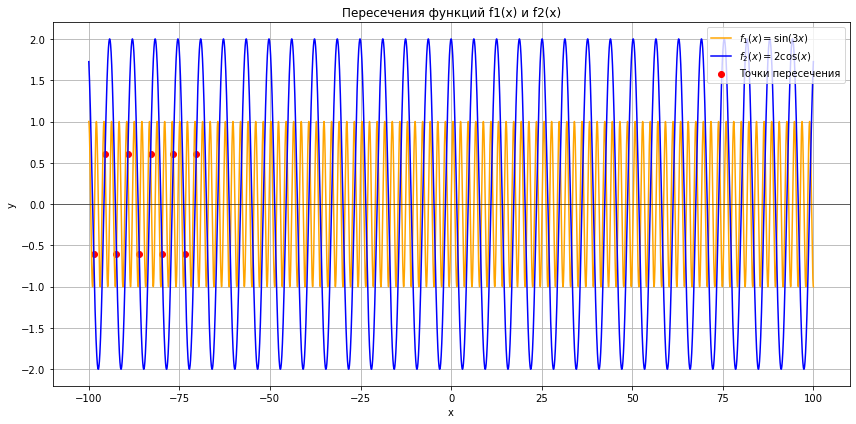

[-98.65302338418401,
 -95.51143073059646,
 -92.36983807701095,
 -89.22824542342866,
 -86.08665276985113,
 -82.9450601162334,
 -79.80346746264362,
 -76.66187480905383,
 -73.52028215546403,
 -70.37868950187423]

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

# Функции из таблицы 2, вариант 1
def f1(x):
    return np.sin(3 * x)

def f2(x):
    return 2 * np.cos(x)

# Диапазон
x_vals = np.linspace(-100, 100, 10000)

# Разность функций
def diff(x):
    return f1(x) - f2(x)

# Приближённые значения пересечений вручную в диапазоне с шагом 0.1
approx_roots = []
for i in range(len(x_vals) - 1):
    if np.sign(diff(x_vals[i])) != np.sign(diff(x_vals[i + 1])):
        root = fsolve(diff, x_vals[i])[0]
        if not any(np.isclose(root, r, atol=1e-2) for r in approx_roots):
            approx_roots.append(root)

# Ограничить до первых 10
first_10_roots = sorted(approx_roots)[:10]

# Построение графика
plt.figure(figsize=(12, 6))
plt.plot(x_vals, f1(x_vals), label=r'$f_1(x) = \sin(3x)$', color='orange')
plt.plot(x_vals, f2(x_vals), label=r'$f_2(x) = 2\cos(x)$', color='blue')
plt.axhline(0, color='black', linewidth=0.5)

# точки пересечения
y_roots = f1(np.array(first_10_roots))
plt.scatter(first_10_roots, y_roots, color='red', label='Точки пересечения')

plt.title('Пересечения функций f1(x) и f2(x)')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

first_10_roots
